In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("intelligent_classroom_categorical_dataset.csv")

In [3]:
data

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,500,14,0.78,Writing,Easy,473,95,-0.73,5,Vocabulary,Good progress.,Reading → Grammar → Speaking,36.16,Low
4996,500,15,0.73,Reading,Medium,312,93,0.05,6,Grammar,Practice grammar rules.,Writing → Reading → Listening,40.83,Medium
4997,500,12,8.50,Writing,Easy,31,67,0.36,0,Vocabulary,Focus on synonyms.,Reading → Grammar → Speaking,31.96,Low
4998,500,11,2.13,Writing,Easy,103,61,-0.09,5,Pronunciation,Focus on synonyms.,Listening → Speaking → Writing,21.79,Low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               5000 non-null   int64  
 1   age                      5000 non-null   int64  
 2   engagement_level         5000 non-null   float64
 3   task_type                5000 non-null   object 
 4   task_difficulty          5000 non-null   object 
 5   time_spent_on_task       5000 non-null   int64  
 6   accuracy_of_responses    5000 non-null   int64  
 7   emotion_score            5000 non-null   float64
 8   frustration_level        5000 non-null   int64  
 9   skill_gap                3734 non-null   object 
 10  personalized_feedback    5000 non-null   object 
 11  optimized_learning_path  5000 non-null   object 
 12  learning_progress        5000 non-null   float64
 13  progress_category        5000 non-null   object 
dtypes: float64(3), int64(5),

In [5]:
data.describe()

,student_id,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,learning_progress
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,250.500000,13.468400,4.942076,314.99840,74.648600,0.009420,5.112800,31.857064
std,144.351715,2.276673,2.880519,165.75942,14.552233,0.579803,3.141409,7.688118
min,1.000000,10.000000,0.000000,30.00000,50.000000,-1.000000,0.000000,8.430000
25%,125.750000,11.000000,2.457500,171.00000,62.000000,-0.490000,2.000000,26.140000
50%,250.500000,13.000000,4.880000,315.00000,74.000000,0.020000,5.000000,31.805000
75%,375.250000,15.000000,7.420000,459.00000,87.000000,0.510000,8.000000,37.410000
max,500.000000,17.000000,10.000000,599.00000,100.000000,1.000000,10.000000,54.830000


Text(0.5, 1.0, 'Outliers in engagement_level')

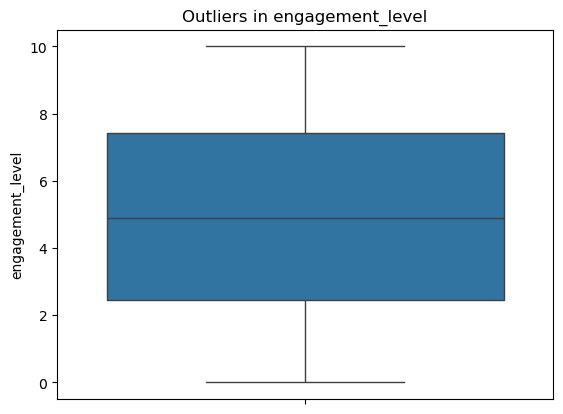

In [6]:
sns.boxplot(y=data["engagement_level"])
plt.title("Outliers in engagement_level")

In [7]:
data.isnull().sum()

student_id                    0
age                           0
engagement_level              0
task_type                     0
task_difficulty               0
time_spent_on_task            0
accuracy_of_responses         0
emotion_score                 0
frustration_level             0
skill_gap                  1266
personalized_feedback         0
optimized_learning_path       0
learning_progress             0
progress_category             0
dtype: int64

In [8]:
data

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,500,14,0.78,Writing,Easy,473,95,-0.73,5,Vocabulary,Good progress.,Reading → Grammar → Speaking,36.16,Low
4996,500,15,0.73,Reading,Medium,312,93,0.05,6,Grammar,Practice grammar rules.,Writing → Reading → Listening,40.83,Medium
4997,500,12,8.50,Writing,Easy,31,67,0.36,0,Vocabulary,Focus on synonyms.,Reading → Grammar → Speaking,31.96,Low
4998,500,11,2.13,Writing,Easy,103,61,-0.09,5,Pronunciation,Focus on synonyms.,Listening → Speaking → Writing,21.79,Low


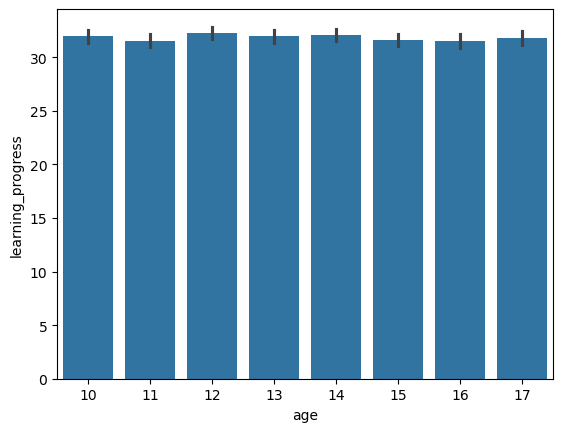

In [9]:
sns.barplot(x="age", y="learning_progress", data=data)
plt.show()

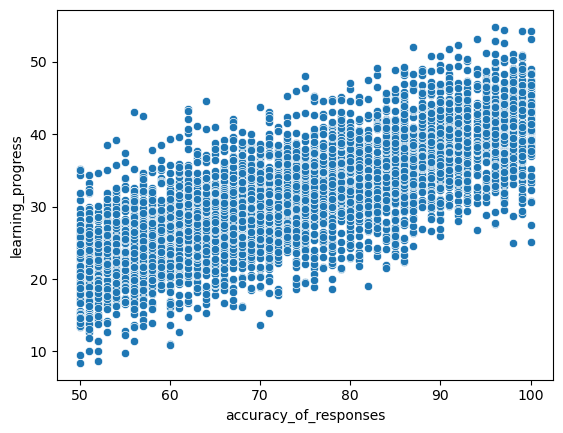

In [10]:
sns.scatterplot(data=data, x="accuracy_of_responses", y="learning_progress")
plt.show()

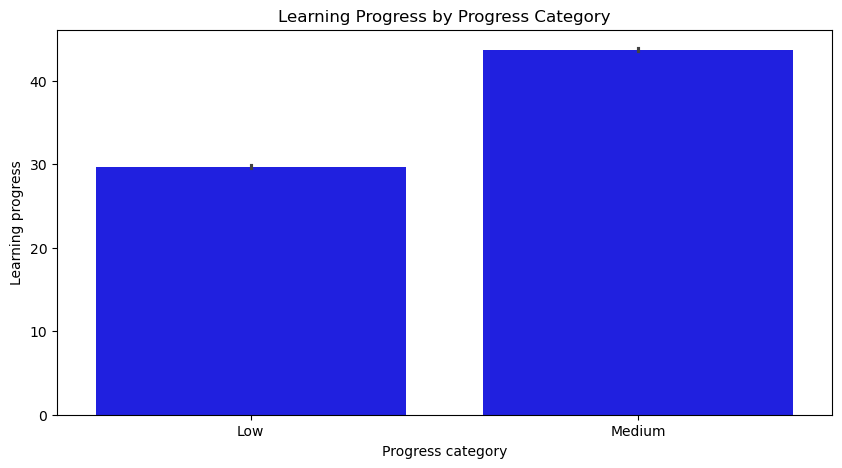

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x="progress_category", y="learning_progress", data=data, color="blue")
plt.xlabel("Progress category")
plt.ylabel("Learning progress")
plt.title("Learning Progress by Progress Category")
plt.show()

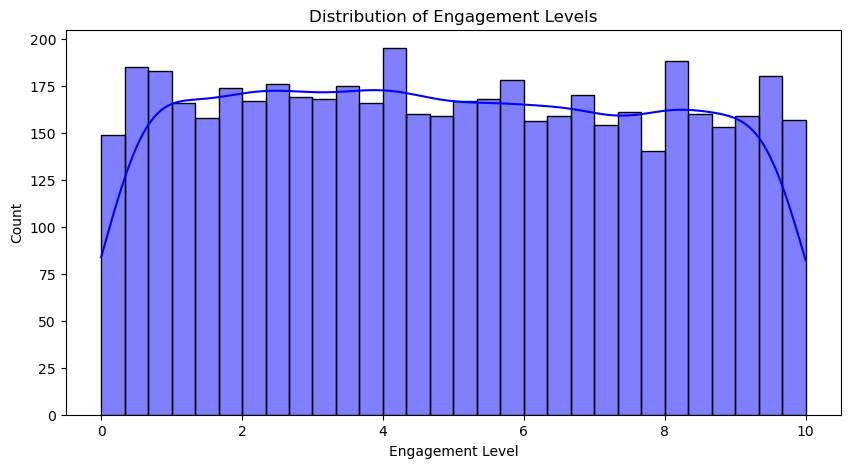

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data["engagement_level"], bins=30, kde=True, color="blue")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.title("Distribution of Engagement Levels")
plt.show()

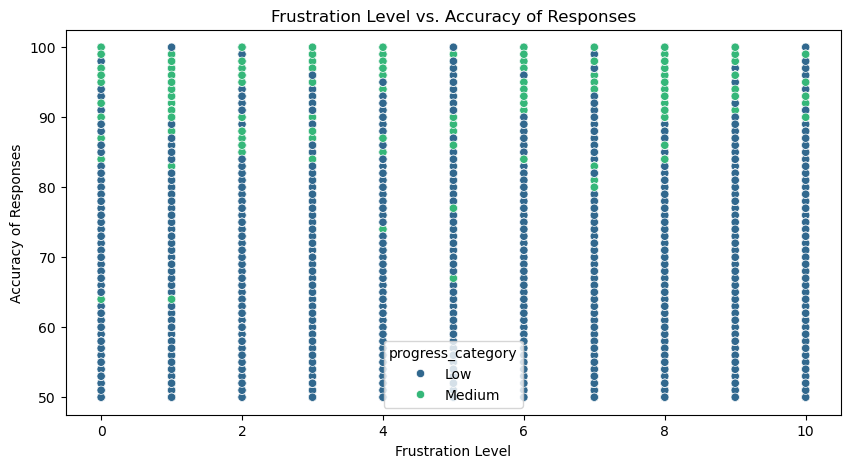

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="frustration_level", y="accuracy_of_responses", data=data, hue="progress_category", palette="viridis")
plt.xlabel("Frustration Level")
plt.ylabel("Accuracy of Responses")
plt.title("Frustration Level vs. Accuracy of Responses")
plt.show()

In [14]:
def task(value):
    if value == 'Easy':
        return 0
    elif value =='Medium':
        return 1
    elif value == 'Hard':
        return 2
    else: 
        return none
data['task_difficulty_labeled'] = data['task_difficulty'].apply(task)


In [15]:
data.skill_gap = data.skill_gap.fillna("No Gap")

In [16]:
data.skill_gap.value_counts()

skill_gap
Grammar          1297
No Gap           1266
Vocabulary       1225
Pronunciation    1212
Name: count, dtype: int64

In [17]:
def skill_gap_label(skill: str)-> int:
    if skill == "No Gap":
        return 0
    elif skill == "Grammar":
        return 1
    elif skill == "Vocabulary":
        return 2
    elif skill == "Pronunciation":
        return 3

data["skill_gap_label"] = data.skill_gap.apply(skill_gap_label)

In [18]:
data.progress_category.value_counts()

progress_category
Low       4226
Medium     774
Name: count, dtype: int64

In [19]:
def progress_category_label(progress: str)-> int:
    if progress == "Low":
        return 0
    elif progress == "Medium":
        return 1
        
data["progress_category_label"] = data.progress_category.apply(progress_category_label)

In [20]:
def task_type_label(task: str)-> int:
    if task == "Grammar":
        return 0
    elif task == "Speaking":
        return 1
    elif task == "Writing":
        return 2
    elif task == "Reading":
        return 3
    elif task == "Listening":
        return 4

data["task_type_label"] = data.task_type.apply(task_type_label)

In [21]:
data_num = data[["age", "engagement_level", "time_spent_on_task", "accuracy_of_responses", "emotion_score", "frustration_level", "task_difficulty_labeled", "skill_gap_label", "progress_category_label", "task_type_label", "learning_progress"]]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'age'),
  Text(1, 0, 'engagement_level'),
  Text(2, 0, 'accuracy_of_responses'),
  Text(3, 0, 'emotion_score'),
  Text(4, 0, 'frustration_level'),
  Text(5, 0, 'task_difficulty_labeled'),
  Text(6, 0, 'skill_gap_label'),
  Text(7, 0, 'progress_category_label'),
  Text(8, 0, 'task_type_label'),
  Text(9, 0, 'learning_progress')])

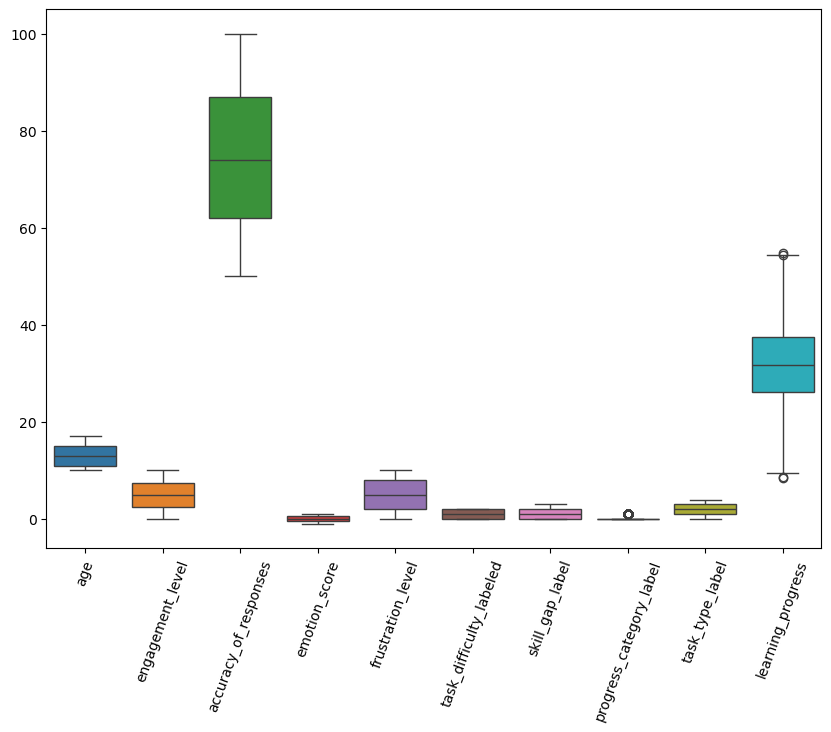

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=data_num.drop(columns=["time_spent_on_task"]))
plt.xticks(rotation=70)

In [23]:
Q1 = data_num["learning_progress"].quantile(.25)
Q3 = data_num["learning_progress"].quantile(.75)
IQR = Q3 - Q1
lower_lim = Q1 - IQR * 1.5
upper_lim = Q3 + IQR * 1.5
print(lower_lim, upper_lim)

9.235000000000007 54.31499999999999


In [24]:
data_num = data_num[(data_num.learning_progress >= lower_lim) & (data_num.learning_progress <= upper_lim)]

In [25]:
data_corr = data_num.corr()

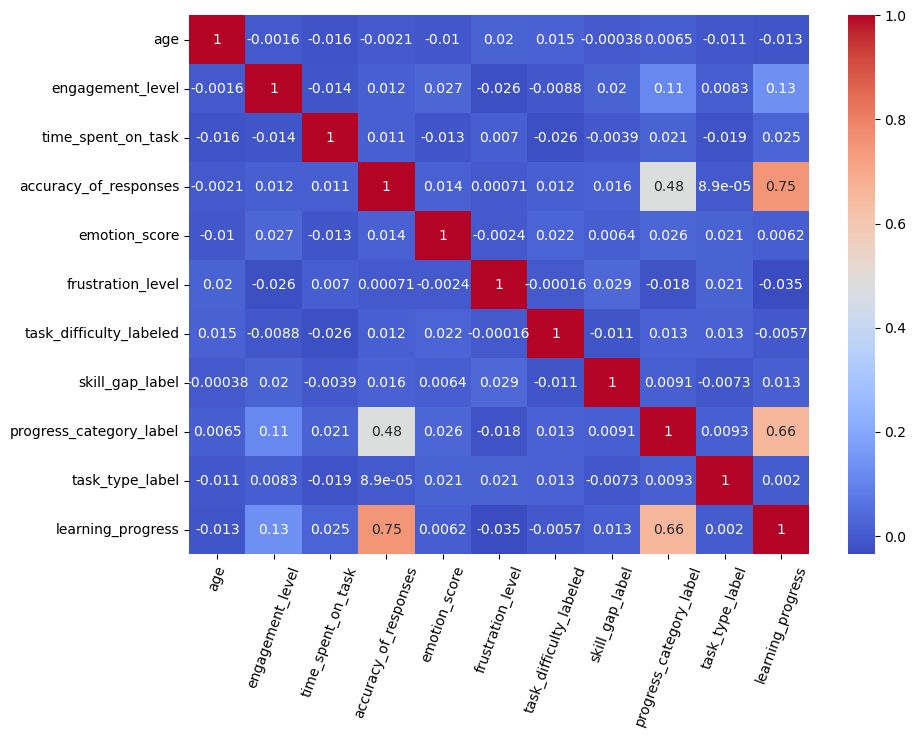

In [26]:
plt.figure(figsize=(10, 7))
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=70)
plt.show()

### Test 1 - model "simplu" liniar
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [27]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [28]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=62)

In [29]:
model1 = LinearRegression()

In [30]:
model1.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred1 = model1.predict(X_test)

In [32]:
MAE = mean_absolute_error(y_test, y_pred1)
MSE = mean_squared_error(y_test, y_pred1)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.3966258058022945
MSE: 18.438490228905472
RMSE: 4.294006314492967


### Test 2 - model "simplu" liniar PolynomialFeatures
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [33]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [34]:
test_err = []
a = int(input("Select lower range: "))
b = int(input("Select upper range: "))
for i in range(a, b):
    poly_conv = PolynomialFeatures(degree=i, include_bias=False)
    X_conv = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
    model = LinearRegression()

    model.fit(X_train, y_train)

    test_pred = model.predict(X_test)

    test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))

Select lower range: 1
Select upper range: 5


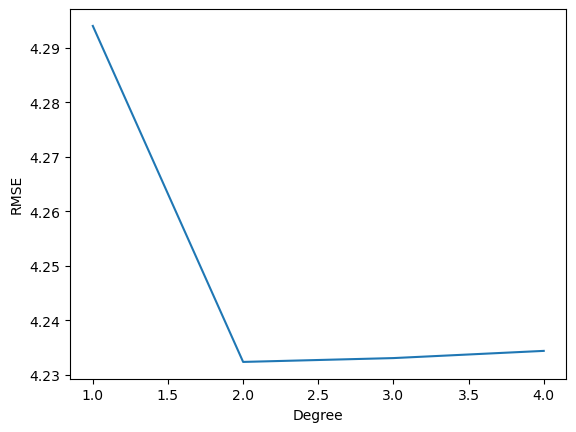

In [35]:
plt.plot(range(a, b), test_err)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.show()

In [36]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
model2 = LinearRegression()

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [37]:
MAE = mean_absolute_error(y_test, y_pred2)
MSE = mean_squared_error(y_test, y_pred2)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.331269253457181
MSE: 17.91259254003794
RMSE: 4.232327083300385


### Test 3 - model "simplu" liniar scalat Polynomial Features
#### engagement_level, accuracy_of_responses, progress_category_label Linear Regression

In [38]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [39]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     model = LinearRegression()

#     model.fit(X_train_scaled, y_train)

#     test_pred = model.predict(X_test_scaled)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [40]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [41]:
poly_conv = PolynomialFeatures(degree=2, include_bias = False)
X_conv = poly_conv.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
X_test_scaled = scaler.transform(X_test)

In [46]:
model3 = LinearRegression()

In [47]:
model3.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
y_pred3 = model3.predict(X_test_scaled)

In [49]:
MAE = mean_absolute_error(y_test, y_pred3)
MSE = mean_squared_error(y_test, y_pred3)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.3312692534572226
MSE: 17.91259254003895
RMSE: 4.232327083300504


### Test 4 - model "simplu" liniar Polynomial Features
#### age, engagement_level, accuracy_of_responses, progress_category_label, skill_gap_label Linear Regression

In [50]:
X = data_num[["age", "engagement_level", "accuracy_of_responses", "progress_category_label", "skill_gap_label"]]
y = data_num["learning_progress"]

In [51]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
model4 = LinearRegression()

model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

In [52]:
MAE = mean_absolute_error(y_test, y_pred4)
MSE = mean_squared_error(y_test, y_pred4)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.3394656522407646
MSE: 17.94997068577886
RMSE: 4.236740573339234


In [53]:
# test_err = []
# a = int(input("Select lower range: "))
# b = int(input("Select upper range: "))
# for i in range(a, b):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     X_conv = poly_conv.fit_transform(X)

#     X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)
#     model = LinearRegression()

#     model.fit(X_train, y_train)

#     test_pred = model.predict(X_test)

#     test_err.append(np.sqrt(mean_squared_error(test_pred, y_test)))
    

In [54]:
# plt.plot(range(a, b), test_err)
# plt.xlabel("Degree")
# plt.ylabel("RMSE")
# plt.show()

In [55]:
data_num

,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,task_difficulty_labeled,skill_gap_label,progress_category_label,task_type_label,learning_progress
0,16,8.28,224,54,0.77,3,2,2,0,1,23.41
1,13,7.65,472,76,-0.54,0,0,3,0,1,31.58
2,14,5.74,332,53,0.41,6,0,1,0,2,24.91
3,16,9.56,77,96,-0.21,9,1,1,1,0,41.41
4,12,2.00,150,62,-0.76,1,1,1,0,3,25.39
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,0.78,473,95,-0.73,5,0,2,0,2,36.16
4996,15,0.73,312,93,0.05,6,1,1,1,3,40.83
4997,12,8.50,31,67,0.36,0,0,2,0,2,31.96
4998,11,2.13,103,61,-0.09,5,0,3,0,2,21.79


### Test 5 - model "simplu" liniar Polynomial Features scaled
#### toate coloanele Linear Regression

In [56]:
X = data_num.drop(columns=["learning_progress"])
y = data_num["learning_progress"]

In [57]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)
X_conv = poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test= train_test_split(X_conv, y, test_size=0.3, random_state=62)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model5 = LinearRegression()

model5.fit(X_train_scaled, y_train)

y_pred5 = model5.predict(X_test_scaled)

In [58]:
MAE = mean_absolute_error(y_test, y_pred5)
MSE = mean_squared_error(y_test, y_pred5)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.3368783229932575
MSE: 17.9520405146939
RMSE: 4.236984837675714


In [59]:
data_num

,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,task_difficulty_labeled,skill_gap_label,progress_category_label,task_type_label,learning_progress
0,16,8.28,224,54,0.77,3,2,2,0,1,23.41
1,13,7.65,472,76,-0.54,0,0,3,0,1,31.58
2,14,5.74,332,53,0.41,6,0,1,0,2,24.91
3,16,9.56,77,96,-0.21,9,1,1,1,0,41.41
4,12,2.00,150,62,-0.76,1,1,1,0,3,25.39
...,...,...,...,...,...,...,...,...,...,...,...
4995,14,0.78,473,95,-0.73,5,0,2,0,2,36.16
4996,15,0.73,312,93,0.05,6,1,1,1,3,40.83
4997,12,8.50,31,67,0.36,0,0,2,0,2,31.96
4998,11,2.13,103,61,-0.09,5,0,3,0,2,21.79


### Test 6 - model ANN
#### toate coloanele 

In [96]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [97]:
X_train_ann

,age,engagement_level,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,task_difficulty_labeled,skill_gap_label,progress_category_label,task_type_label
1556,11,8.18,526,90,0.35,1,0,0,0,3
1994,14,7.35,581,99,0.17,3,0,1,0,2
2422,14,5.97,60,53,-0.25,8,1,1,0,1
3742,16,5.44,378,67,0.29,2,2,1,0,3
766,14,4.74,441,86,-0.03,2,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...
1082,14,3.61,314,68,-0.44,9,1,0,0,3
3342,17,0.94,53,98,0.80,0,2,1,1,3
2164,15,8.30,454,71,0.37,2,0,0,0,1
1618,15,1.43,279,85,0.19,7,2,3,0,4


In [98]:
X_train_ann.shape[1]

10

In [99]:
model_ann1 = Sequential([
    Dense(16, activation = 'relu', input_dim = X_train_ann.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(16, activation = 'relu', input_dim = X_train_ann.shape[1]),
    Dense(1)
])

model_ann1.compile(optimizer=Adam(0.02), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
history = model_ann1.fit(X_train_ann, y_train_ann, epochs=15, batch_size=16)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 476.1245  
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.4350  
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 29.8724
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.0018  
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 25.9913
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.4024
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2159  
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 19.6626
Epoch 9/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 23.9577
Epoch 10/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 22.6071
Epoch 11/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.8473  
Epoch 12/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.2953  
Epoch 13/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.1994  
Epoch 14/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 21.4875
Epoch 15/15
219/

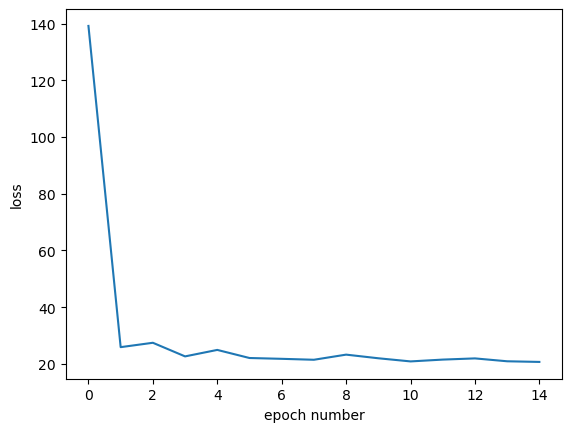

In [101]:
plt.plot(history.history['loss'])
plt.xlabel('epoch number')
plt.ylabel("loss")
# plt.xlim(40,500)
# plt.ylim(0,3)
plt.show()

In [102]:
y_pred_ann_1 = model_ann1.predict(X_test_ann)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [103]:
MAE = mean_absolute_error(y_test, y_pred_ann_1)
MSE = mean_squared_error(y_test, y_pred_ann_1)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.784763836749321
MSE: 22.16461761874913
RMSE: 4.70793135238282


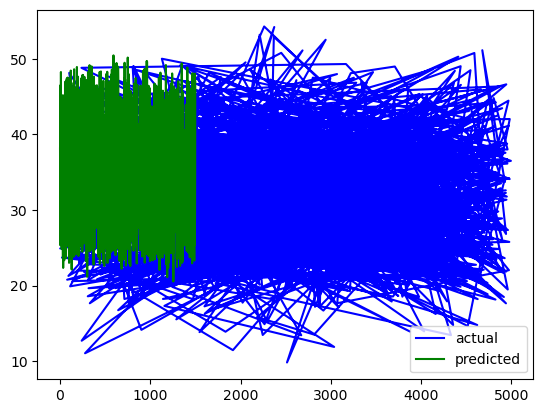

In [111]:
plt.plot(y_test_ann, label='actual', color='b')
plt.plot(y_pred_ann_1, label='predicted', color='g')
plt.legend()
plt.show()

### Test 7 - model ANN date scalate
#### toate coloanele 

In [95]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [104]:
scaler = StandardScaler()

In [105]:
X_train_ann_scaled = scaler.fit_transform(X_train_ann)
X_test_ann_scaled = scaler.transform(X_test_ann)

In [168]:
model_ann2 = Sequential([
    Dense(32, activation = 'relu', input_dim = X_train_ann_scaled.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(32, activation = 'relu', input_dim = X_train_ann_scaled.shape[1]),
    Dense(1)
])

model_ann2.compile(optimizer=Adam(0.1), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
history = model_ann2.fit(X_train_ann_scaled, y_train_ann, epochs=30, batch_size=16)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112.0275 
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.3474  
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 23.5821
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6831  
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.2555  
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 21.1289
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7244  
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21.9178  
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.6735
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 20.9277
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.5337  
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.8170
Epoch 13/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4879  
Epoch 14/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.2317  
Epoch 15/30
219/219

In [170]:
y_pred_ann_2 = model_ann2.predict(X_test_ann_scaled)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [171]:
MAE = mean_absolute_error(y_test, y_pred_ann_2)
MSE = mean_squared_error(y_test, y_pred_ann_2)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.4118397420688495
MSE: 18.54862547502454
RMSE: 4.306811520722092


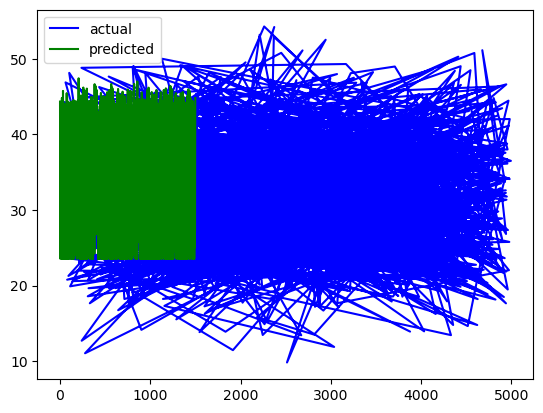

In [163]:
plt.plot(y_test_ann, label='actual', color='b')
plt.plot(y_pred_ann_2, label='predicted', color='g')
plt.legend()
plt.show()

### Test 8 - model ANN date scalate
#### engagement_level, accuracy_of_responses, progress_category_label

In [134]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [135]:
scaler = StandardScaler()

In [136]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [137]:
X_train_ann_scaled2 = scaler.fit_transform(X_train_ann)
X_test_ann_scaled2 = scaler.transform(X_test_ann)

In [145]:
model_ann3 = Sequential([
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]),
    Dense(1)
])

model_ann3.compile(optimizer=Adam(0.02), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
history = model_ann3.fit(X_train_ann_scaled2, y_train_ann, epochs=15, batch_size=16)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 272.1408  
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2046
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.8539  
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.1080  
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.2018
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3617  
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4331  
Epoch 8/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9699  
Epoch 9/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 19.2227
Epoch 10/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5223
Epoch 11/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9067
Epoch 12/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4989
Epoch 13/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 19.6155
Epoch 14/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7266  
Epoch 15/15
219/219 ━━━━

In [140]:
y_pred_ann_3 = model_ann3.predict(X_test_ann_scaled2)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [141]:
MAE = mean_absolute_error(y_test, y_pred_ann_3)
MSE = mean_squared_error(y_test, y_pred_ann_3)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.4476604164434
MSE: 18.572366634906
RMSE: 4.309566873237495


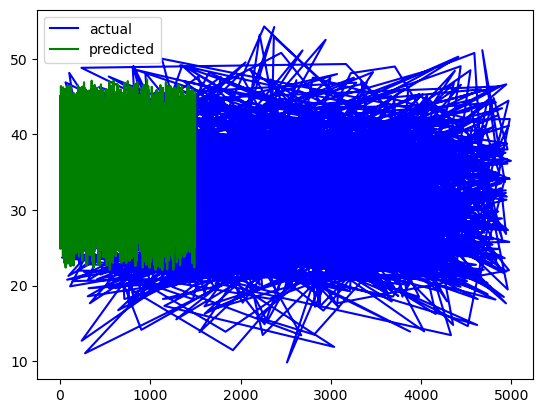

In [142]:
plt.plot(y_test_ann, label='actual', color='b')
plt.plot(y_pred_ann_3, label='predicted', color='g')
plt.legend()
plt.show()

### Test 9 - model ANN date scalate cu Early Stopping
#### engagement_level, accuracy_of_responses, progress_category_label

In [191]:
X = data_num[["engagement_level", "accuracy_of_responses", "progress_category_label"]]
y = data_num["learning_progress"]

In [192]:
scaler = StandardScaler()

In [193]:
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X, y, test_size=0.3, random_state=62)

In [194]:
X_train_ann_scaled3 = scaler.fit_transform(X_train_ann)
X_test_ann_scaled3 = scaler.transform(X_test_ann)

In [213]:
model_ann4 = Sequential([
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]), # input_shape = X_train_ann.shape[1]
    Dense(16, activation = 'relu', input_dim = X_train_ann_scaled2.shape[1]),
    Dense(1)
])

model_ann4.compile(optimizer=Adam(0.02), loss='mean_squared_error')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

In [215]:
history = model_ann4.fit(X_train_ann_scaled3, y_train_ann, epochs=100, batch_size=16, callbacks=[early_stopping])

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 303.6024 
Epoch 2/100
133/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3804

C:\Users\User\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.3907
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9948  
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.1063  
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 19.5785
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 19.7409
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.2394  
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.7338  
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4663
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.2979  
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.1033  
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.9254  
Epoch 13/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.5902  
Epoch 14/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.9983  
Epoch 15/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.1124
Epoch 16/100
219/2

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.0619  
Epoch 80/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.7802  
Epoch 81/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.8557  
Epoch 82/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 19.4343
Epoch 83/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 18.8803
Epoch 84/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 18.0174
Epoch 85/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.0564
Epoch 86/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 18.3498
Epoch 87/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.8000  
Epoch 88/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.1201  
Epoch 89/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2701
Epoch 90/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.1622  
Epoch 91/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 17.6504
Epoch 92/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2736
Epoch 93/10

In [216]:
y_pred_ann_4 = model_ann4.predict(X_test_ann_scaled3)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [217]:
MAE = mean_absolute_error(y_test, y_pred_ann_4)
MSE = mean_squared_error(y_test, y_pred_ann_4)
RMSE = np.sqrt(MSE)
print(f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}")

MAE: 3.443277127022263
MSE: 18.767275152041282
RMSE: 4.332121322405604
